In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

FINIDING THE AVERAGE ASPECT RATIO FOR OPTIMAL PADDING

In [2]:
data_dir = r"C:\Users\Ayushman\Desktop\CODES\PYTHON\IE4476\IE4476_Data"

image_counter = 0
width_sum = 0
height_sum = 0

for label in os.listdir(data_dir):
    animal_dir = os.path.join(data_dir, label)
    if os.path.isdir(animal_dir):
        for img_file in os.listdir(animal_dir):
            img_path = os.path.join(animal_dir, img_file)
            img = cv2.imread(img_path)
            image_counter += 1
            width_sum += img.shape[1]
            height_sum += img.shape[0]




target_size = (int((height_sum/image_counter)*0.1), int((width_sum/image_counter)*0.1))

Codes for Data Augmentation

In [3]:
import cv2
import numpy as np
import random

def augment_image(img):
    # Rotation
    angle = np.random.uniform(-15, 15)  # Rotate between -15 and +15 degrees
    center = (img.shape[1] // 2, img.shape[0] // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    img_rotated = cv2.warpAffine(img, rotation_matrix, (img.shape[1], img.shape[0]))

    # Horizontal Flip
    img_flipped = cv2.flip(img, 1)

    img_adjusted = img + random.uniform(0,1)
    img_adjusted = (img_adjusted -0.5) * random.uniform(0, 1) + 0.5
    img_adjusted = np.clip(img_adjusted, 0.0, 1.0)
    
    return img_rotated, img_flipped, img_adjusted


def perspective_transform(img):
    h, w = img.shape[:2]
    pts1 = np.float32([[0, 0], [w-1, 0], [0, h-1], [w-1, h-1]])
    pts2 = pts1 + np.random.uniform(-10, 10, pts1.shape).astype(np.float32)  # Random perturbation
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    return cv2.warpPerspective(img, matrix, (w, h))

def apply_gaussian_sharpening(img, ksize=(3, 3), alpha=1.5):
    # Apply Gaussian blur
    blurred_img = cv2.GaussianBlur(img, ksize, 0)
    # Sharpening by subtracting the blurred image
    sharpened_img = cv2.addWeighted(img, 1 + alpha, blurred_img, -alpha, 0)
    return sharpened_img


CONVERTING IMAGES INTO FEATURE SET WITH PADDING

In [6]:
data_dir = r"C:\Users\Ayushman\Desktop\CODES\PYTHON\IE4476\IE4476_Data"
images = []
labels = []




for label in os.listdir(data_dir):
    animal_dir = os.path.join(data_dir, label)
    if os.path.isdir(animal_dir):
        for img_file in os.listdir(animal_dir):
            img_path = os.path.join(animal_dir, img_file)
            img = cv2.imread(img_path)
            if img is None:
                continue

            h, w = img.shape[:2]
            aspect_ratio = w / h
            print(img_path)

            scale_factor = min(target_size[1]/w, target_size[0]/h)
            new_height = int(h*scale_factor)
            new_width = int(w*scale_factor)
            # if aspect_ratio > 1:
            #     new_width = target_size[1]
            #     new_height = int(target_size[1] / aspect_ratio)

            # else:
            #     new_height = target_size[0]
            #     new_width = int(target_size[0] * aspect_ratio)

            img_resized = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_AREA)

            y_offset = (target_size[0] - new_height)//2
            x_offset = (target_size[1] - new_width)//2

            padded_img = np.zeros((target_size[0], target_size[1], 3), dtype=np.uint8)
            padded_img[y_offset:y_offset + new_height, x_offset:x_offset + new_width] = img_resized
            
            padded_img_normalized = padded_img.astype('float32')/ 255.0
            img1, img2, img3 = augment_image(padded_img_normalized)
            img1 = apply_gaussian_sharpening(img1)
            img2 = apply_gaussian_sharpening(img2)
            img3 = apply_gaussian_sharpening(img3)

            print('Images processed')
            images.append(padded_img_normalized)
            # images.append(img1)
            # images.append(img2)
            # images.append(img3)
            # labels.append(label)
            # labels.append(label)
            labels.append(label)

X = np.array(images)
y = np.array(labels)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
            

C:\Users\Ayushman\Desktop\CODES\PYTHON\IE4476\IE4476_Data\antelope\02f4b3be2d.jpg
Images processed
C:\Users\Ayushman\Desktop\CODES\PYTHON\IE4476\IE4476_Data\antelope\03d7fc0888.jpg
Images processed
C:\Users\Ayushman\Desktop\CODES\PYTHON\IE4476\IE4476_Data\antelope\058fa9a60f.jpg
Images processed
C:\Users\Ayushman\Desktop\CODES\PYTHON\IE4476\IE4476_Data\antelope\0a37838e99.jpg
Images processed
C:\Users\Ayushman\Desktop\CODES\PYTHON\IE4476\IE4476_Data\antelope\0b1a3af197.jpg
Images processed
C:\Users\Ayushman\Desktop\CODES\PYTHON\IE4476\IE4476_Data\antelope\0b688923b0.jpg
Images processed
C:\Users\Ayushman\Desktop\CODES\PYTHON\IE4476\IE4476_Data\antelope\0c16ef86c0.jpg
Images processed
C:\Users\Ayushman\Desktop\CODES\PYTHON\IE4476\IE4476_Data\antelope\0e17715606.jpg
Images processed
C:\Users\Ayushman\Desktop\CODES\PYTHON\IE4476\IE4476_Data\antelope\0ee903ea13.jpg
Images processed
C:\Users\Ayushman\Desktop\CODES\PYTHON\IE4476\IE4476_Data\antelope\0fb2e9aa81.jpg
Images processed
C:\Users\A

TEST TO SEE HOW THE PREPROCESSING WORKS

(56, 80, 3)
(56, 80, 3)
(56, 80, 3)
(56, 80, 3)


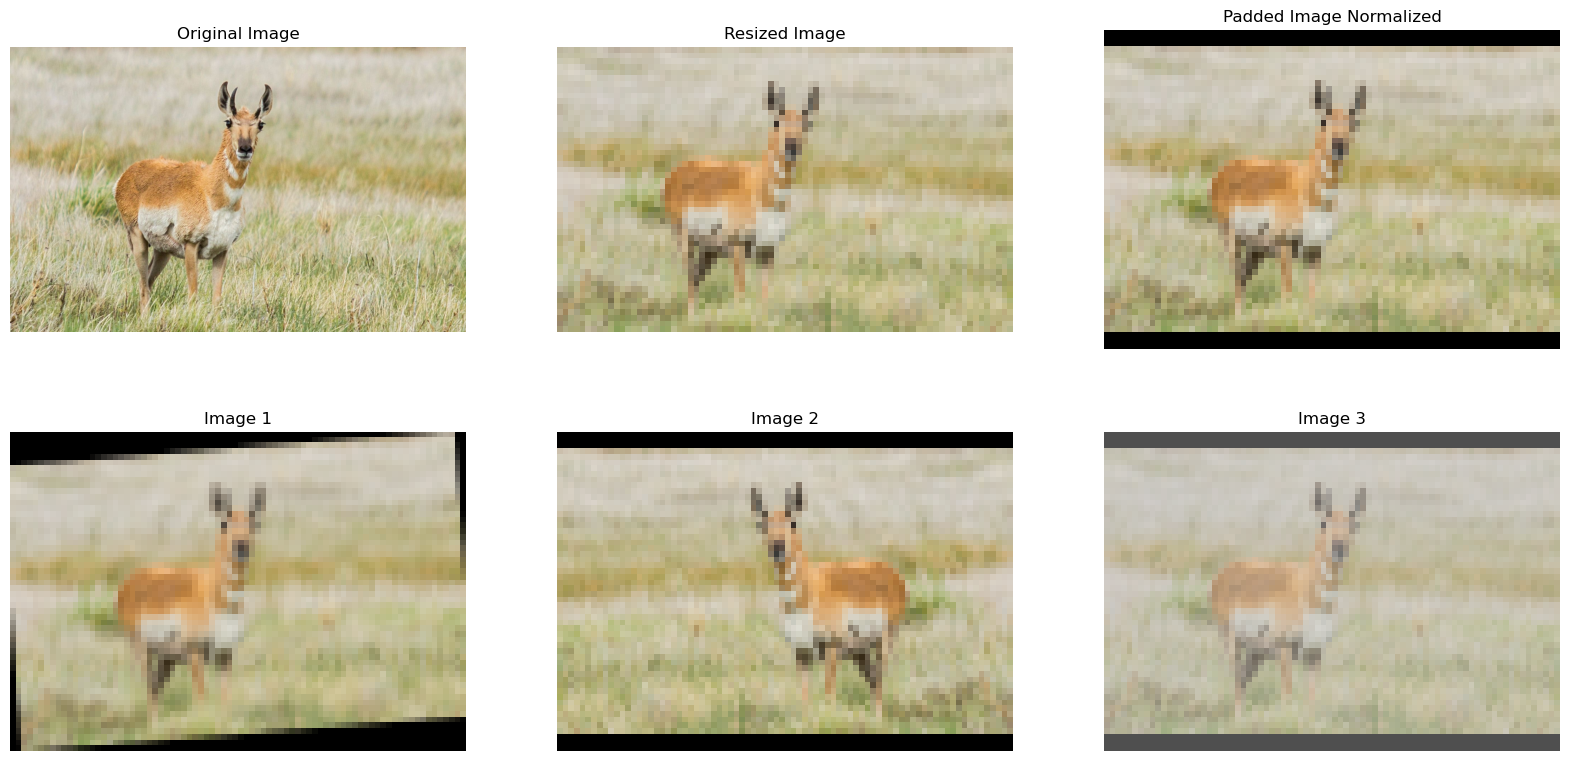

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


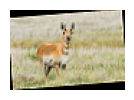

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


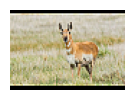

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


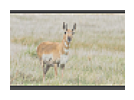

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


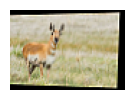

In [18]:
data_dir = r"C:\Users\Ayushman\Desktop\CODES\PYTHON\IE4476\IE4476_Data"
# target_size = (128, 128)

# images = []
# labels = []
# image_counter = 0
# width_sum = 0
# height_sum = 0

# for label in os.listdir(data_dir):
#     animal_dir = os.path.join(data_dir, label)
#     if os.path.isdir(animal_dir):
#         for img_file in os.listdir(animal_dir):
#             img_path = os.path.join(animal_dir, img_file)
#             img = cv2.imread(img_path)
#             image_counter += 1
#             width_sum += img.shape[1]
#             height_sum += img.shape[0]

# target_size = (int(height_sum/image_counter), int(width_sum/image_counter))


test_img = cv2.imread(r"C:\Users\Ayushman\Desktop\CODES\PYTHON\IE4476\IE4476_Data\antelope\02f4b3be2d.jpg")

h, w = test_img.shape[:2]
aspect_ratio = w / h


scale_factor = min(target_size[1]/w, target_size[0]/h)
new_height = int(h*scale_factor)
new_width = int(w*scale_factor)

# if aspect_ratio > 1:
#     print(aspect_ratio)
#     new_width = target_size[1]
#     new_height = int(target_size[1] / aspect_ratio)
# else:
#     new_height = target_size[0]
#     new_width = int(target_size[0] * aspect_ratio)

resized_img = cv2.resize(test_img, (new_width, new_height), interpolation=cv2.INTER_AREA)

y_offset = (target_size[0] - new_height) //2
x_offset = (target_size[1] - new_width)//2



padded_img = np.zeros((target_size[0], target_size[1], 3), dtype=np.uint8)
padded_img[y_offset:y_offset + new_height, x_offset: x_offset + new_width] = resized_img

padded_img_normalized = padded_img.astype('float32')/255.0
img1, img2, img3 = augment_image(padded_img_normalized)
img4 = perspective_transform(padded_img_normalized)
img1_sharpened = apply_gaussian_sharpening(img1)
img2_sharpened = apply_gaussian_sharpening(img2)
img3_sharpened = apply_gaussian_sharpening(img3)
img4_sharpened = apply_gaussian_sharpening(img4)

import matplotlib.pyplot as plt

# Convert BGR (OpenCV default) to RGB for displaying with Matplotlib
resized_image_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
padded_img_rgb = cv2.cvtColor(padded_img, cv2.COLOR_BGR2RGB)
padded_img_normalized_rgb = cv2.cvtColor(padded_img_normalized, cv2.COLOR_BGR2RGB)
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img1_sharpened_rgb = cv2.cvtColor(img1_sharpened, cv2.COLOR_BGR2RGB)
img2_sharpened_rgb = cv2.cvtColor(img2_sharpened, cv2.COLOR_BGR2RGB)
img3_sharpened_rgb = cv2.cvtColor(img3_sharpened, cv2.COLOR_BGR2RGB)
img4_sharpened_rgb = cv2.cvtColor(img4_sharpened, cv2.COLOR_BGR2RGB)

print(img1_sharpened.shape)
print(img2_sharpened.shape)
print(img3_sharpened.shape)
print(img4_sharpened.shape)

# Display the original and resized images
plt.figure(figsize=(20, 20))

# Original Image
plt.subplot(4, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.axis("off")

# Resized Image
plt.subplot(4, 3, 2)
plt.title("Resized Image")
plt.imshow(resized_image_rgb)
plt.axis("off")

plt.subplot(4, 3, 3)
plt.title("Padded Image Normalized")
plt.imshow(padded_img_normalized_rgb)
plt.axis("off")

plt.subplot(4, 3, 4)
plt.title("Image 1")
plt.imshow(img1_rgb)
plt.axis("off")

plt.subplot(4, 3, 5)
plt.title("Image 2")
plt.imshow(img2_rgb)
plt.axis("off")

plt.subplot(4, 3, 6)
plt.title("Image 3")
plt.imshow(img3_rgb)
plt.axis("off")
plt.show()

plt.subplot(4, 3, 7)
# plt.title("Random rotation with Gaussian Sharpening")
plt.imshow(img1_sharpened_rgb)
plt.axis("off")
plt.show()

plt.subplot(4, 3, 8)
# plt.title("Horizontal inversion with Gaussian Sharpening")
plt.imshow(img2_sharpened_rgb)
plt.axis("off")
plt.show()

plt.subplot(4, 3, 9)
# plt.title("Random Brightness and Contrast Change with Gaussian Sharpening")
plt.imshow(img3_sharpened_rgb)
plt.axis("off")
plt.show()

plt.subplot(4, 3, 10)
# plt.title("   ")
plt.imshow(img4_sharpened_rgb)
plt.axis("off")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
num_samples = X.shape[0]
num_features = X.shape[1] * X.shape[2] * X.shape[3]

train_images = []
train_labels = []

for img, label in zip(X_train, y_train):
    img1, img2, img3 = augment_image(img)
    img4 = perspective_transform(img)
    img1_sharpened = apply_gaussian_sharpening(img1)
    img2_sharpened = apply_gaussian_sharpening(img2)
    img3_sharpened = apply_gaussian_sharpening(img3)
    img4_sharpened = apply_gaussian_sharpening(img4)
    train_images.append(img)
    train_images.append(img1_sharpened)
    train_images.append(img2_sharpened)
    train_images.append(img3_sharpened)
    train_images.append(img4_sharpened)
    train_labels.append(label)
    train_labels.append(label)
    train_labels.append(label)
    train_labels.append(label)
    train_labels.append(label)


X_ = np.array(train_images)
y_ = np.array(train_labels)

num_samples = X_.shape[0]
num_features = X_.shape[1] * X.shape[2] * X.shape[3] 


y_train = y_
X_train_flattened = X_.reshape(num_samples, num_features)
X_test_flattened = X_test.reshape(X_test.shape[0], num_features)


In [13]:
X_train_flattened.shape

(21600, 13440)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=300)
X_train_pca  = pca.fit_transform(X_train_flattened)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=40)
X_train_lda = lda.fit_transform(X_train_pca, y_train)
X_test_pca = pca.transform(X_test_flattened)
X_test_LDA = lda.transform(X_test_pca)

NO DATA AUGMENTATION AND NO PCA OR LDA

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
num_samples = X.shape[0]
num_features = X.shape[1] * X.shape[2] * X.shape[3]

X_train_flattened = X_train.reshape(X_train.shape[0], num_features)
X_test_flattened = X_test.reshape(X_test.shape[0], num_features)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_flattened, y_train)

y_pred = knn.predict(X_test_flattened)

print(accuracy_score(y_test, y_pred))


0.07037037037037037


ONLY AUGMENTATION

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
num_samples = X.shape[0]
num_features = X.shape[1] * X.shape[2] * X.shape[3]

train_images = []
train_labels = []

for img, label in zip(X_train, y_train):
    img1, img2, img3 = augment_image(img)
    img4 = perspective_transform(img)
    img1_sharpened = apply_gaussian_sharpening(img1)
    img2_sharpened = apply_gaussian_sharpening(img2)
    img3_sharpened = apply_gaussian_sharpening(img3)
    img4_sharpened = apply_gaussian_sharpening(img4)
    train_images.append(img)
    train_images.append(img1_sharpened)
    train_images.append(img2_sharpened)
    train_images.append(img3_sharpened)
    train_images.append(img4_sharpened)
    train_labels.append(label)
    train_labels.append(label)
    train_labels.append(label)
    train_labels.append(label)
    train_labels.append(label)


X_ = np.array(train_images)
y_ = np.array(train_labels)

num_samples = X_.shape[0]
num_features = X_.shape[1] * X.shape[2] * X.shape[3] 


y_train = y_
X_train_flattened = X_.reshape(num_samples, num_features)
X_test_flattened = X_test.reshape(X_test.shape[0], num_features)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_flattened, y_train)

y_pred = knn.predict(X_test_flattened)

print(accuracy_score(y_test, y_pred))


0.18055555555555555


PCA + AUGMENTATION

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
num_samples = X.shape[0]
num_features = X.shape[1] * X.shape[2] * X.shape[3]

train_images = []
train_labels = []

for img, label in zip(X_train, y_train):
    img1, img2, img3 = augment_image(img)
    img4 = perspective_transform(img)
    img1_sharpened = apply_gaussian_sharpening(img1)
    img2_sharpened = apply_gaussian_sharpening(img2)
    img3_sharpened = apply_gaussian_sharpening(img3)
    img4_sharpened = apply_gaussian_sharpening(img4)
    train_images.append(img)
    train_images.append(img1_sharpened)
    train_images.append(img2_sharpened)
    train_images.append(img3_sharpened)
    train_images.append(img4_sharpened)
    train_labels.append(label)
    train_labels.append(label)
    train_labels.append(label)
    train_labels.append(label)
    train_labels.append(label)


X_ = np.array(train_images)
y_ = np.array(train_labels)

num_samples = X_.shape[0]
num_features = X_.shape[1] * X.shape[2] * X.shape[3] 


y_train = y_
X_train_flattened = X_.reshape(num_samples, num_features)
X_test_flattened = X_test.reshape(X_test.shape[0], num_features)

pca = PCA(n_components=300)
X_train_pca = pca.fit_transform(X_train_flattened)
X_test_pca = pca.transform(X_test_flattened)



knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)

y_pred = knn.predict(X_test_pca)

print(accuracy_score(y_test, y_pred))


0.1962962962962963


LDA + AUGMENTATION

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
num_samples = X.shape[0]
num_features = X.shape[1] * X.shape[2] * X.shape[3]

train_images = []
train_labels = []

for img, label in zip(X_train, y_train):
    img1, img2, img3 = augment_image(img)
    img4 = perspective_transform(img)
    img1_sharpened = apply_gaussian_sharpening(img1)
    img2_sharpened = apply_gaussian_sharpening(img2)
    img3_sharpened = apply_gaussian_sharpening(img3)
    img4_sharpened = apply_gaussian_sharpening(img4)
    train_images.append(img)
    train_images.append(img1_sharpened)
    train_images.append(img2_sharpened)
    train_images.append(img3_sharpened)
    train_images.append(img4_sharpened)
    train_labels.append(label)
    train_labels.append(label)
    train_labels.append(label)
    train_labels.append(label)
    train_labels.append(label)


X_ = np.array(train_images)
y_ = np.array(train_labels)

num_samples = X_.shape[0]
num_features = X_.shape[1] * X.shape[2] * X.shape[3] 


y_train = y_
X_train_flattened = X_.reshape(num_samples, num_features)
X_test_flattened = X_test.reshape(X_test.shape[0], num_features)

lda = LDA(n_components=40)
X_train_lda = lda.fit_transform(X_train_flattened, y_train)
X_test_lda = lda.transform(X_test_flattened)



knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_lda, y_train)

y_pred = knn.predict(X_test_lda)

print(accuracy_score(y_test, y_pred))


0.1648148148148148


PCA + LDA + AUGMENTATION

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
num_samples = X.shape[0]
num_features = X.shape[1] * X.shape[2] * X.shape[3]

train_images = []
train_labels = []

for img, label in zip(X_train, y_train):
    img1, img2, img3 = augment_image(img)
    img4 = perspective_transform(img)
    img1_sharpened = apply_gaussian_sharpening(img1)
    img2_sharpened = apply_gaussian_sharpening(img2)
    img3_sharpened = apply_gaussian_sharpening(img3)
    img4_sharpened = apply_gaussian_sharpening(img4)
    train_images.append(img)
    train_images.append(img1_sharpened)
    train_images.append(img2_sharpened)
    train_images.append(img3_sharpened)
    train_images.append(img4_sharpened)
    train_labels.append(label)
    train_labels.append(label)
    train_labels.append(label)
    train_labels.append(label)
    train_labels.append(label)


X_ = np.array(train_images)
y_ = np.array(train_labels)

num_samples = X_.shape[0]
num_features = X_.shape[1] * X.shape[2] * X.shape[3] 


y_train = y_
X_train_flattened = X_.reshape(num_samples, num_features)
X_test_flattened = X_test.reshape(X_test.shape[0], num_features)


pca = PCA(n_components=300)
X_train_pca = pca.fit_transform(X_train_flattened)
X_test_pca = pca.transform(X_test_flattened)

lda = LDA(n_components=40)
X_train_lda = lda.fit_transform(X_train_pca, y_train)
X_test_lda = lda.transform(X_test_pca)



knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_lda, y_train)

y_pred = knn.predict(X_test_lda)

print(accuracy_score(y_test, y_pred))


0.28425925925925927


Grid Search to find the best hyperparameters

In [146]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Define your dataset

# Parameter grid for GridSearch
param_grid = {
    'pca_n_components': [100, 300 ,500, 750],   # PCA n_components options
    'lda_n_components': [10, 40, 70, 89],      # LDA n_components options
    'knn_k': [3, 5, 15, 25]                  # k for KNN
}

# Initialize variables to track the best model and score
best_accuracy = 0
best_params = {}

# Grid Search Loop
for pca_n_components in param_grid['pca_n_components']:
    for lda_n_components in param_grid['lda_n_components']:
        for knn_k in param_grid['knn_k']:
            # Step 1: Apply PCA with specified n_components
            pca = PCA(n_components=pca_n_components)
            X_train_pca = pca.fit_transform(X_train_flattened)
            X_test_pca = pca.transform(X_test_flattened)
            
            # Step 2: Apply LDA with specified n_components
            lda = LDA(n_components=lda_n_components)
            X_train_lda = lda.fit_transform(X_train_pca, y_train)
            X_test_lda = lda.transform(X_test_pca)
            
            # Step 3: Train KNN with specified k
            knn = KNeighborsClassifier(n_neighbors=knn_k)
            knn.fit(X_train_lda, y_train)
            
            # Step 4: Make predictions and calculate accuracy
            y_pred = knn.predict(X_test_lda)
            accuracy = accuracy_score(y_test, y_pred)
            
            # Update best model if current accuracy is better
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    'pca_n_components': pca_n_components,
                    'lda_n_components': lda_n_components,
                    'knn_k': knn_k
                }

# Output the best parameters and accuracy
print(f"Best Accuracy: {best_accuracy:.4f}")
print(f"Best Parameters: {best_params}")


Best Accuracy: 0.2954
Best Parameters: {'pca_n_components': 300, 'lda_n_components': 40, 'knn_k': 5}
